<a href="https://colab.research.google.com/github/luciekash/Computer-Vision-/blob/main/Introduction_To_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Defining the Question**

**a) Specifying the Data Analysis Question** 

Build and evaluate a model for verifying people's age.

**b) Defining the Metric for Success**

We will have accomplished our objective if we build a high accuarcy model that helps verify people's age


**c) Understanding the Context**

The supermarket chain would like to explore whether Data Science can help them adhere to alcohol laws by making sure they do not sell alcohol to people underage. You are asked to conduct that evaluation, so as you set to work, keep the following in mind:

● The shops are equipped with cameras in the checkout area which are triggered when a person is buying alcohol.

● Computer vision methods can be used to determine the age of a person from a photo.

● The task then is to build and evaluate a model for verifying people's age.


**d) Recording the Experimental Design**

   1.Load datasets and libraries

   2.Clean data and analyze it

   3.Build a model

   4.Summarize findings

   5.Provide recommendations

   6.Challenge the solution


**e) Data Relevance**

The dataset provided is appropriate and relevant to the research question



##2. Data Cleaning & Preparation

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# to display all columns
pd.set_option('display.max.columns', None)

# to display the entire contents of a cell
pd.set_option('display.max_colwidth', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# load and preview dataset

labels = pd.read_csv('/content/labels (1).csv')

labels.head(10)

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17
5,000005.jpg,27
6,000006.jpg,24
7,000007.jpg,43
8,000008.jpg,26
9,000009.jpg,39


In [4]:
# check dataset shape
labels.shape

(7591, 2)

In [5]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


##3. Modelling

In [6]:
#import required libraries
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
import tensorflow as tf

In [7]:
#initialize ImageDataGenerator
generator = ImageDataGenerator(rescale=1./255)

In [8]:
#load test
import warnings
warnings.filterwarnings('ignore')

generator_flow = generator.flow_from_dataframe(
        dataframe=labels,
        
        directory='/content/drive/MyDrive/final_files.zip (Unzipped Files)/computer vision',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345
)

Found 7591 validated image filenames.


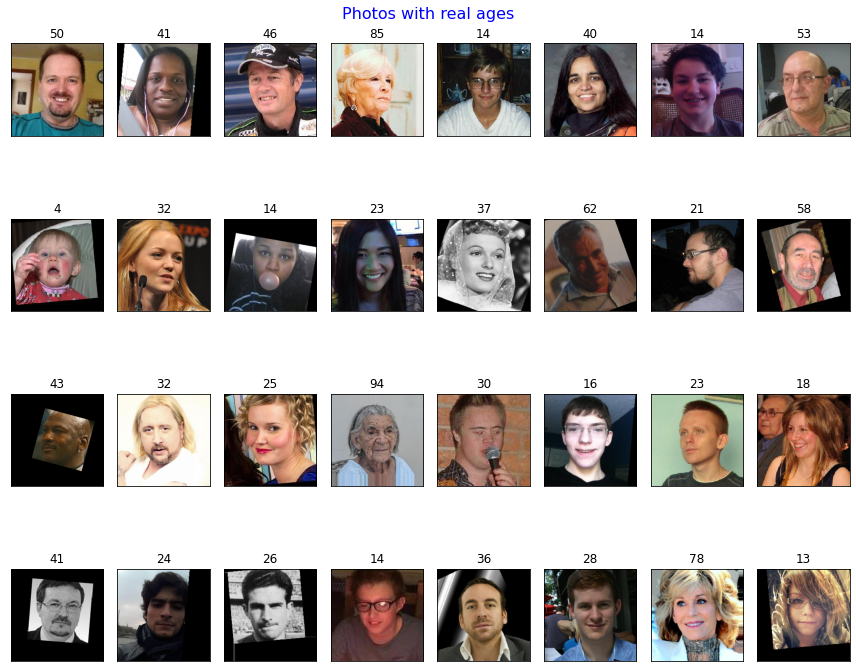

In [9]:
#plot features
features, target = next(generator_flow)

fig = plt.figure(figsize=(12,12))
for i in range(32):
    fig.add_subplot(4, 8, i+1)
    plt.imshow(features[i])
    plt.title(f'{target[i]}')
# remove axes and place the images closer to one another for a more compact output
    plt.xticks([])
    plt.yticks([])
    plt.suptitle('Photos with real ages',  y=0.9,fontsize=16, color='b')
    plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c5d336190>]],
      dtype=object)

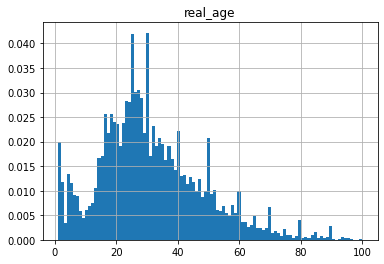

In [10]:
#plot distribution of age labels
labels.hist(bins=100,density=True)

In [11]:
generator_train = ImageDataGenerator(validation_split=0.25, rescale=1./255,shear_range=0.2,
                                    horizontal_flip=True,)


train_X = generator_train.flow_from_dataframe(
        dataframe=labels,
        directory='/content/drive/MyDrive/final_files.zip (Unzipped Files)/computer vision/',
        x_col='file_name',
        y_col='real_age',
        target_size=(150, 150),
        batch_size=32,
        class_mode='raw',
        seed=12345,
        subset='training')

Found 5694 validated image filenames.


In [12]:
#load test
generator_test = ImageDataGenerator(validation_split=0.25, rescale=1./255)
test_X = generator_test.flow_from_dataframe(
        dataframe=labels,
        directory='/content/drive/MyDrive/final_files.zip (Unzipped Files)/computer vision/',
        x_col='file_name',
        y_col='real_age',
        target_size=(150, 150),
        batch_size=32,
        class_mode='raw',
        seed=12345,
        subset='validation')

Found 1897 validated image filenames.


In [13]:
#create model

optimizer= Adam() 
backbone = ResNet50(input_shape=(150,150,3),weights='imagenet', include_top=False)
model = Sequential()
model.add(backbone)
model.add(GlobalAveragePooling2D())
model.add(Dense(1, activation='relu'))
model.compile(loss="mean_squared_error",optimizer=optimizer, metrics=["mean_absolute_error"])

94781440/94765736 [==============================] - 1s 0us/step


In [14]:
#model function
def model_train(model, train_data, test_data,batch_size=None,epochs=10, steps_per_epoch =None, validation_steps=None):
    my_callbacks = [ tf.keras.callbacks.EarlyStopping(patience=20)] 
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
    model.fit(train_data,
          validation_data=test_data,
          steps_per_epoch=steps_per_epoch,
          validation_steps=validation_steps,
          verbose=1, epochs=epochs,  callbacks=my_callbacks)
    return model

In [ ]:
#Apply function
model_trained = model_train(model, train_X, test_X,batch_size=None,epochs=50,
                            steps_per_epoch =None, validation_steps=None)

Epoch 1/50
 78/178 [============>.................] - ETA: 19:22 - loss: 280.0036 - mean_absolute_error: 12.7294

In [16]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Trains the model given the parameters
    """
    
    model.fit(train_data, validation_data=test_data, batch_size=batch_size, 
              epochs=epochs, steps_per_epoch=steps_per_epoch, 
              validation_steps=validation_steps, verbose=2)

    return model

In [ ]:
#saving trained model

model_trained.save("model.h5")